In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras import models
from keras import layers
import seaborn as sns

Using TensorFlow backend.


In [0]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))
train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test
nohe_train_x=train_x.copy()
nohe_test_x=test_x.copy()
all_x=train_x.append(test_x)
all_x_ohe=pd.get_dummies(all_x,columns=['fiberID'])
test_x_ohe=all_x_ohe.loc[199990:]
train_x_ohe=all_x_ohe.loc[:199990]


In [0]:
# train_x_ohe.iloc[:,:20]
mean=train_x_ohe.iloc[:,:20].mean()
std=train_x_ohe.iloc[:,:20].std()

In [0]:
tanh_train_x=0.5*np.tanh(0.01*((train_x_ohe.iloc[:,:20]-mean)/std))+1
tanh_test_x=0.5*np.tanh(0.01*((test_x_ohe.iloc[:,:20]-mean)/std))+1

In [0]:
from sklearn.model_selection import train_test_split
part_tanh_train_x,tanh_val_x,partial_train_y,val_y=train_test_split(tanh_train_x,train_y,test_size=0.15)

In [25]:
-6.750146e+00	

-6.750146

In [0]:

nohe_train_x=nohe_train_x.drop('fiberID',axis=1,inplace=False)
nohe_test_x=nohe_test_x.drop('fiberID',axis=1,inplace=False)

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_x.drop(train_x.loc[:,'fiberID_1':],axis=1))
train_x_ohe_scaled=scaler.transform(train_ohe_x.drop(train_x.loc[:,'fiberID_1':],axis=1))
test_x_ohe_scaled=scaler.transform(test_ohe_x.drop(test_x.loc[:,'fiberID_1':],axis=1))


In [0]:
train_x_scaled=pd.DataFrame(train_x_ohe_scaled,columns=train_x.columns[:20])
test_x_scaled=pd.DataFrame(test_x_ohe_scaled,columns=test_x.columns[:20])

In [0]:
train_x_final=pd.concat([train_x_ohe_scaled,train_x.loc[:,'fiberID_1':]],axis=1)
test_x_final=pd.concat([test_x_ohe_scaled,test_x.loc[:,'fiberID_1':]],axis=1)


In [0]:
train_x.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,fiberID_1,fiberID_2,fiberID_3,fiberID_4,fiberID_5,fiberID_6,fiberID_7,fiberID_8,fiberID_9,fiberID_10,fiberID_11,fiberID_12,fiberID_13,fiberID_14,fiberID_15,fiberID_16,fiberID_17,fiberID_18,fiberID_19,fiberID_20,...,fiberID_961,fiberID_962,fiberID_963,fiberID_964,fiberID_965,fiberID_966,fiberID_967,fiberID_968,fiberID_969,fiberID_970,fiberID_971,fiberID_972,fiberID_973,fiberID_974,fiberID_975,fiberID_976,fiberID_977,fiberID_978,fiberID_979,fiberID_980,fiberID_981,fiberID_982,fiberID_983,fiberID_984,fiberID_985,fiberID_986,fiberID_987,fiberID_988,fiberID_989,fiberID_990,fiberID_991,fiberID_992,fiberID_993,fiberID_994,fiberID_995,fiberID_996,fiberID_997,fiberID_998,fiberID_999,fiberID_1000
count,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.00000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,...,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.0000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.0000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281,0.001480,0.001745,0.001385,0.001585,0.001315,0.00166,0.001465,0.001720,0.001380,0.001560,0.001480,0.001650,0.001450,0.001825,0.001335,0.001715,0.001405,0.001745,0.001580,0.001690,...,0.000085,0.000295,0.000115,0.000370,0.000080,0.000355,0.000110,0.000325,0.000080,0.000335,0.0001,0.000340,0.000105,0.000390,0.000115,0.000430,0.0001,0.000365,0.000105,0.000335,0.000095,0.000360,0.000140,0.000360,0.000075,0.000360,0.000125,0.000320,0.000140,0.000365,0.000050,0.000320,0.000085,0.000300,0.000140,0.000360,0.000070,0.000375,0.000135,0.000335
std,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138,0.038443,0.041738,0.037191,0.039781,0.036240,0.04071,0.038248,0.041438,0.037124,0.039467,0.038443,0.040588,0.038052,0.042682,0.036514,0.041378,0.037458,0.041738,0.039719,0.041076,...,0.009219,0.017173,0.010723,0.019232,0.008944,0.018839,0.010488,0.018025,0.008944,0.018300,0.0100,0.018436,0.010247,0.019745,0.010723,0.020733,0.0100,0.019102,0.010247,0.018300,0.009747,0.018971,0.011832,0.018971,0.008660,0.018971,0.011180,0.017886,0.011832,0.019102,0.007071,0.017886,0.009219,0.017318,0.011832,0.018971,0.008367,0.019362,0.011618,0.018300
min,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [0]:
from sklearn.model_selection import train_test_split
partial_X_train,X_val,partial_y_train,y_val=train_test_split(train_x_final,train_y,test_size=.1)
partial_X_org_train,X_org_val,partial_y_org_train,y_org_val=train_test_split(train_x,train_y,test_size=0.15)
partial_X_nohe_train,X_nohe_val,partial_y_nohe_train,y_nohe_val=train_test_split(nohe_train_x,train_y)

In [0]:
partial_X_train.iloc[:,:20]

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
147690,0.996481,0.919216,0.899830,0.846642,0.717476,0.997406,0.465348,0.643973,0.715588,0.591229,0.075747,0.681883,0.774377,0.805765,0.633822,0.644741,0.777567,0.748996,0.906046,0.778881
50189,0.996481,0.919247,0.899865,0.846680,0.717519,0.997407,0.465351,0.644004,0.715632,0.591253,0.075748,0.681914,0.774405,0.805790,0.633832,0.644760,0.777596,0.749016,0.906072,0.778923
75544,0.996482,0.919218,0.899793,0.846597,0.717429,0.997408,0.465348,0.643940,0.715531,0.591190,0.075747,0.681855,0.774310,0.805717,0.633761,0.644779,0.777545,0.748953,0.905990,0.778798
111344,0.996481,0.919229,0.899845,0.846662,0.717493,0.997406,0.465350,0.643988,0.715611,0.591249,0.075746,0.681895,0.774393,0.805774,0.633821,0.644737,0.777578,0.749003,0.906059,0.778895
29264,0.996481,0.919204,0.899811,0.846625,0.717461,0.997406,0.465347,0.643958,0.715571,0.591220,0.075745,0.681868,0.774360,0.805754,0.633810,0.644736,0.777555,0.748984,0.906035,0.778868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15497,0.996481,0.919218,0.899840,0.846645,0.717485,0.997406,0.465348,0.643982,0.715591,0.591236,0.075745,0.681882,0.774385,0.805769,0.633824,0.644730,0.777567,0.749001,0.906050,0.778886
51567,0.996481,0.919122,0.899692,0.846508,0.717359,0.997404,0.465339,0.643853,0.715442,0.591142,0.075735,0.681775,0.774242,0.805682,0.633732,0.644652,0.777481,0.748910,0.905950,0.778760
145268,0.996481,0.919179,0.899769,0.846582,0.717422,0.997406,0.465345,0.643921,0.715523,0.591190,0.075743,0.681838,0.774317,0.805728,0.633778,0.644716,0.777532,0.748957,0.906004,0.778827
160687,0.996481,0.919176,0.899769,0.846583,0.717425,0.997406,0.465344,0.643921,0.715524,0.591193,0.075743,0.681834,0.774317,0.805729,0.633781,0.644709,0.777529,0.748958,0.906005,0.778827


In [35]:
from keras import optimizers
model=models.Sequential()
model.add(layers.Dense(1024,activation='relu',input_shape=(20,)))
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(1024,activation='relu'))
model.add(layers.Dense(19,activation='softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])
history=model.fit(part_tanh_train_x,partial_train_y,epochs=50,batch_size=32,validation_data=(tanh_val_x,val_y))


Train on 169992 samples, validate on 29999 samples
Epoch 1/50
169992/169992 [==============================] - 22s 130us/step - loss: 2.3116 - acc: 0.2481 - val_loss: 2.3054 - val_acc: 0.2477
Epoch 2/50
169992/169992 [==============================] - 22s 130us/step - loss: 2.3074 - acc: 0.2485 - val_loss: 2.3008 - val_acc: 0.2477
Epoch 3/50
169992/169992 [==============================] - 22s 129us/step - loss: 2.3070 - acc: 0.2485 - val_loss: 2.3013 - val_acc: 0.2477
Epoch 4/50
169992/169992 [==============================] - 22s 127us/step - loss: 2.3068 - acc: 0.2485 - val_loss: 2.3017 - val_acc: 0.2477
Epoch 5/50
 62976/169992 [==========>...................] - ETA: 13s - loss: 2.3027 - acc: 0.2492

KeyboardInterrupt: ignored

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_train_x,rf_val_x,rf_train_y,rf_val_y=train_test_split(train_x,train_y,test_size=0.15,stratify=train_y)
rf=RandomForestClassifier(n_jobs=-1,n_estimators=200,max_depth=50)
rf.fit(rf_train_x,rf_train_y)
rf.score(rf_val_x,rf_val_y)

0.8771625720857362

In [63]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
RandomForestClassifier()
param_grid={'n_estimators':[300],'max_depth':[30,50,70],'min_samples_split':[2,3,4]}
grid=GridSearchCV(rf,param_grid=param_grid,scoring='neg_log_loss',n_jobs=-1,cv=5)

In [0]:
grid.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
from sklearn.metrics import log_loss
val_pred=rf.predict(rf_val_x( )

In [60]:
submission = pd.DataFrame(data=val_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submissionrf.csv', index=True)

ValueError: ignored

In [56]:
np.unique(val_pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 18])

In [0]:
from keras import optimizers
model=models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(20,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(19,activation='softmax'))
model.compile(optimizer=optimizers.adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_crossentropy'])
history=model.fit(nohe_train_x,train_y,epochs=50,batch_size=64)

Epoch 1/50
199991/199991 [==============================] - 13s 63us/step - loss: 1.0807 - sparse_categorical_crossentropy: 1.0807
Epoch 2/50
199991/199991 [==============================] - 12s 59us/step - loss: 0.7899 - sparse_categorical_crossentropy: 0.7899
Epoch 3/50
199991/199991 [==============================] - 12s 58us/step - loss: 0.6882 - sparse_categorical_crossentropy: 0.6882
Epoch 4/50
199991/199991 [==============================] - 12s 59us/step - loss: 0.6269 - sparse_categorical_crossentropy: 0.6269
Epoch 5/50
199991/199991 [==============================] - 12s 59us/step - loss: 0.6032 - sparse_categorical_crossentropy: 0.6032
Epoch 6/50
199991/199991 [==============================] - 12s 58us/step - loss: 0.5827 - sparse_categorical_crossentropy: 0.5827
Epoch 7/50
199991/199991 [==============================] - 12s 58us/step - loss: 0.5706 - sparse_categorical_crossentropy: 0.5706
Epoch 8/50
199991/199991 [==============================] - 12s 58us/step - loss: 0

In [0]:
def plot_loss(history):
  #50 epochs #64 batchsize 64~512
  train_categorical_crossentropy=history.history['loss'] 
  validation_categorical_crossentropy=history.history['val_loss']
  xlimit=range(1,len(validation_categorical_crossentropy)+1)
  plt.plot(xlimit,train_categorical_crossentropy,'r',label='Training Categorical CrossEntropy')
  plt.plot(xlimit,validation_categorical_crossentropy,'b',label='Validation Categorical CrossEntropy')
  plt.title('Losses Graph')
  plt.xlabel('Epochs')
  plt.ylabel('Loss == Metrics')
  plt.legend()
  plt.show()
  print('batch_size :', history.params['batch_size'])
  print('metrics : ',history.params['metrics'])

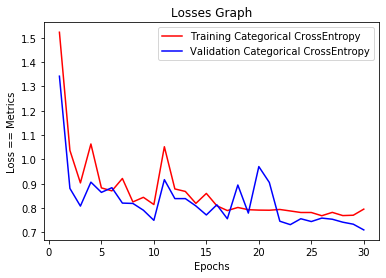

batch_size : 256
metrics :  ['loss', 'sparse_categorical_crossentropy', 'val_loss', 'val_sparse_categorical_crossentropy']


In [0]:
plot_loss(history)

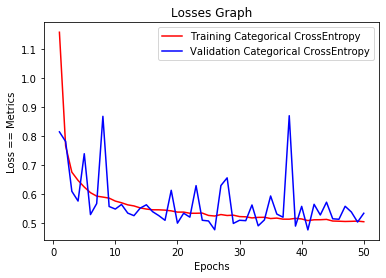

batch_size : 32
metrics :  ['loss', 'sparse_categorical_crossentropy', 'val_loss', 'val_sparse_categorical_crossentropy']


In [0]:
plot_loss(history)

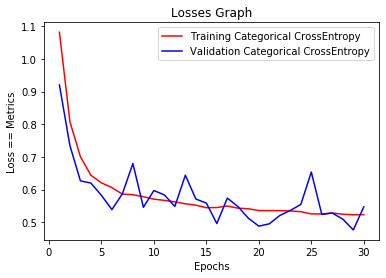

batch_size : 32
metrics :  ['loss', 'sparse_categorical_crossentropy', 'val_loss', 'val_sparse_categorical_crossentropy']


In [0]:
plot_loss(history)

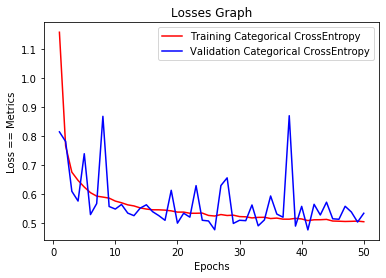

batch_size : 32
metrics :  ['loss', 'sparse_categorical_crossentropy', 'val_loss', 'val_sparse_categorical_crossentropy']


In [0]:
plot_loss(history)

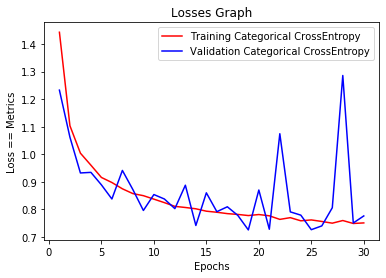

batch_size : 64
metrics :  ['loss', 'sparse_categorical_crossentropy', 'val_loss', 'val_sparse_categorical_crossentropy']


In [0]:
plot_loss(history)

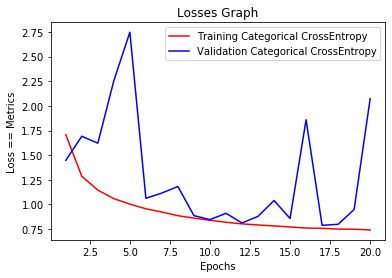

batch_size : 128
metrics :  ['loss', 'sparse_categorical_crossentropy', 'val_loss', 'val_sparse_categorical_crossentropy']


In [0]:
plot_loss(history)

In [0]:
history.params

{'batch_size': 128,
 'do_validation': True,
 'epochs': 20,
 'metrics': ['loss',
  'sparse_categorical_crossentropy',
  'val_loss',
  'val_sparse_categorical_crossentropy'],
 'samples': 169992,
 'steps': None,
 'verbose': 1}

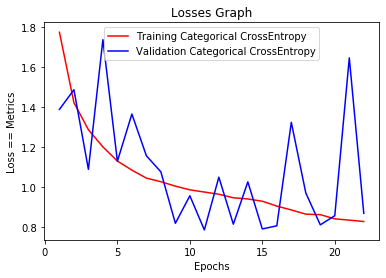

In [0]:

train_categorical_crossentropy=history.history['loss'] #100 epochs #32 batchsize
validation_categorical_crossentropy=history.history['val_loss']
xlimit=range(1,len(validation_categorical_crossentropy)+1)
plt.plot(xlimit,train_categorical_crossentropy,'r',label='Training Categorical CrossEntropy')
plt.plot(xlimit,validation_categorical_crossentropy,'b',label='Validation Categorical CrossEntropy')
plt.title('Losses Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss == Metrics')
plt.legend()
plt.show()

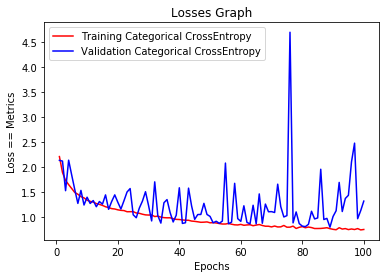

In [0]:
train_categorical_crossentropy=history.history['loss'] #100 epochs #256 batchsize
validation_categorical_crossentropy=history.history['val_loss']
xlimit=range(1,len(validation_categorical_crossentropy)+1)
plt.plot(xlimit,train_categorical_crossentropy,'r',label='Training Categorical CrossEntropy')
plt.plot(xlimit,validation_categorical_crossentropy,'b',label='Validation Categorical CrossEntropy')
plt.title('Losses Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss == Metrics')
plt.legend()
plt.show()

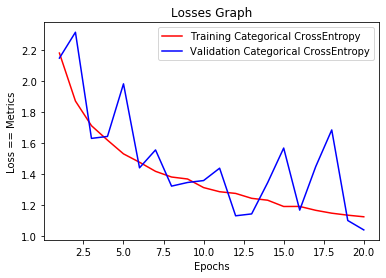

In [0]:
train_categorical_crossentropy=history.history['loss'] #20 epochs #256 batchsize
validation_categorical_crossentropy=history.history['val_loss']
xlimit=range(1,len(validation_categorical_crossentropy)+1)
plt.plot(xlimit,train_categorical_crossentropy,'r',label='Training Categorical CrossEntropy')
plt.plot(xlimit,validation_categorical_crossentropy,'b',label='Validation Categorical CrossEntropy')
plt.title('Losses Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss == Metrics')
plt.legend()
plt.show()

In [0]:
pred=model.predict(test.drop('fiberID',axis=1))

In [0]:
submission = pd.DataFrame(data=pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submission.csv', index=True)